# Es geht um einen Datensatz über Kickstarter Bewerbungen. die Daten wurden auf https://webrobots.io/kickstarter-datasets/ erhoben. Die letzten 30 Datensätze wurden zusammengeführt. Der zusammengeführte Datensatz besteht aus 15000 Zeilen und 36 Spalten

# CSV Import

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from matplotlib.ticker import FuncFormatter
merged_df = pd.read_csv('merged_kickstarter_data.csv')

In [112]:
duplicate_rows = merged_df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)



Duplicate Rows: 0


In [113]:
columns_to_delete = ['converted_pledged_amount', 'country_displayable_name', 'currency_symbol', 
                     'currency_trailing_code', 'current_currency', 'static_usd_rate', 
                     'usd_exchange_rate', 'usd_pledged', 'usd_type']

# Drop the columns
merged_df.drop(columns=columns_to_delete, inplace=True)

# Übersicht

In [114]:
summary_stats = merged_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
       backers_count    created_at      deadline       fx_rate          goal  \
count   15000.000000  1.500000e+04  1.500000e+04  15000.000000  1.500000e+04   
mean      138.338933  1.545287e+09  1.480814e+09      0.965437  4.543535e+04   
std       650.701310  1.172628e+08  3.335232e+08      0.247252  9.763701e+05   
min         0.000000  1.242694e+09  0.000000e+00      0.006394  0.000000e+00   
25%         4.000000  1.444160e+09  1.435271e+09      1.000000  1.000000e+03   
50%        29.000000  1.548857e+09  1.533838e+09      1.000000  5.000000e+03   
75%        97.000000  1.659138e+09  1.655552e+09      1.000000  1.200000e+04   
max     36374.000000  1.715718e+09  1.720943e+09      1.259820  1.000000e+08   

                 id   launched_at  percent_funded       pledged  \
count  1.500000e+04  1.500000e+04    15000.000000  1.500000e+04   
mean   1.077746e+09  1.472798e+09      498.406389  4.465346e+04   
std    6.171294e+08  3.428677e+08    11537.182210  6.1786

In [115]:
merged_df.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,disable_communication,fx_rate,...,prelaunch_activated,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,urls,video
0,149,Funding the physical release of my NEW 5-song ...,"{""id"":40,""name"":""Indie Rock"",""analytics_name"":...",US,1466447593,"{""id"":536141083,""name"":""Craig Bidiman"",""slug"":...",USD,1469847600,False,1.000000,...,False,"{""id"":2567768,""project_id"":2567768,""state"":""ac...",another-musicians-farewell-album-for-late-father,https://www.kickstarter.com/discover/categorie...,True,False,successful,1469847602,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":683479,""status"":""successful"",""hls"":null,..."
1,11,I'm a Single Air Force Veteran & there are no ...,"{""id"":342,""name"":""Web"",""analytics_name"":""Web"",...",US,1406383924,"{""id"":856836724,""name"":""Tara Broadway (deleted...",USD,1410790320,False,1.000000,...,False,"{""id"":1229257,""project_id"":1229257,""state"":""in...",date-a-veteran-and-disabled-veterans-website,https://www.kickstarter.com/discover/categorie...,True,False,successful,1410790320,"{""web"":{""project"":""https://www.kickstarter.com...",NaN
2,31,The debate rages on: Hard G or soft G? Let's p...,"{""id"":342,""name"":""Web"",""analytics_name"":""Web"",...",US,1405635865,"{""id"":1172118120,""name"":""Scott Sackville"",""is_...",USD,1409210814,False,1.000000,...,False,"{""id"":1198000,""project_id"":1198000,""state"":""in...",gif-vs-gif,https://www.kickstarter.com/discover/categorie...,True,False,successful,1409210814,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":418233,""status"":""successful"",""hls"":null,..."
3,3,Pilot show shot in Pompeii. Working title is S...,"{""id"":303,""name"":""Television"",""analytics_name""...",GB,1538245810,"{""id"":930935040,""name"":""Leo Bonomo"",""is_regist...",GBP,1541594877,False,1.259820,...,False,"{""id"":3481096,""project_id"":3481096,""state"":""in...",sensing-history,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1540385659,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":913687,""status"":""successful"",""hls"":""http..."
4,1,Kim Konnects is an Afro-Caribbean TV show that...,"{""id"":303,""name"":""Television"",""analytics_name""...",CA,1534212812,"{""id"":1226905652,""name"":""Kimberly Douglas"",""is...",CAD,1536818340,False,0.733209,...,False,"{""id"":3447780,""project_id"":3447780,""state"":""in...",kim-konnects-tv-show-the-caribbean-konnection-...,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1536556503,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":902944,""status"":""successful"",""hls"":""http..."


# Analyse

<Figure size 1200x600 with 0 Axes>

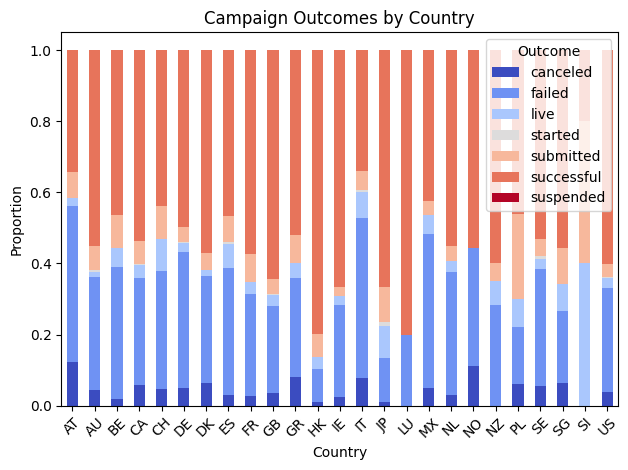

In [118]:
total_campaigns_per_country = merged_df['country'].value_counts()

campaign_outcomes_per_country = merged_df.groupby(['country', 'state']).size().unstack(fill_value=0)

success_rate_per_country = campaign_outcomes_per_country['successful'] / total_campaigns_per_country

plt.figure(figsize=(12, 6))
campaign_outcomes_per_country.div(total_campaigns_per_country, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Campaign Outcomes by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

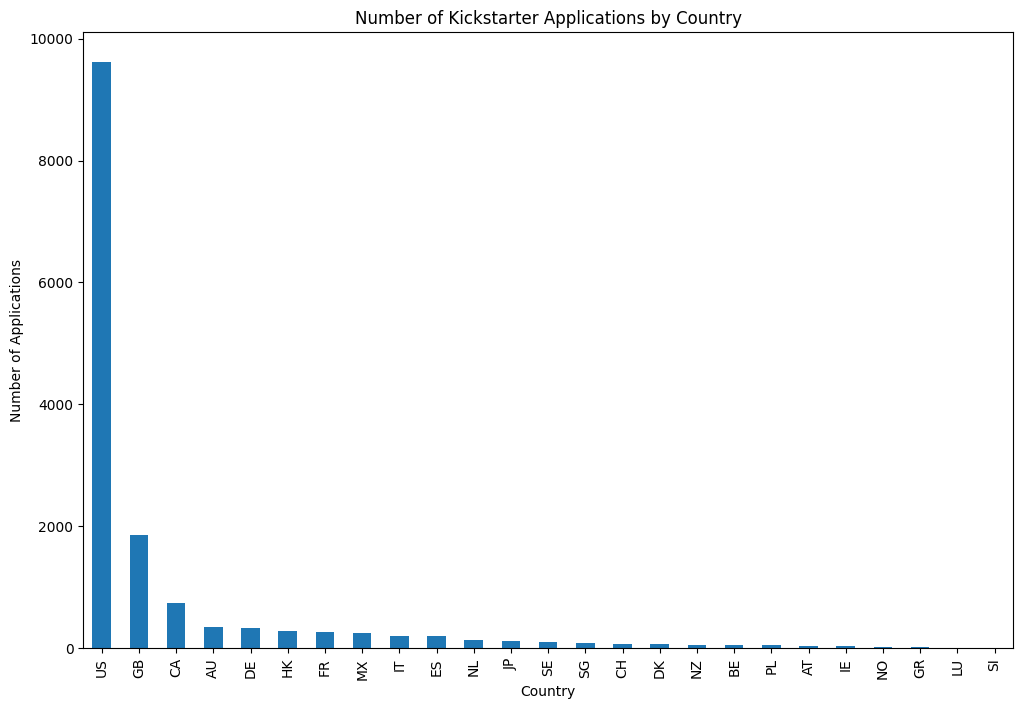

In [119]:
country_counts = merged_df['country'].value_counts()

plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')

plt.title('Number of Kickstarter Applications by Country')
plt.xlabel('Country')
plt.ylabel('Number of Applications')

plt.show()

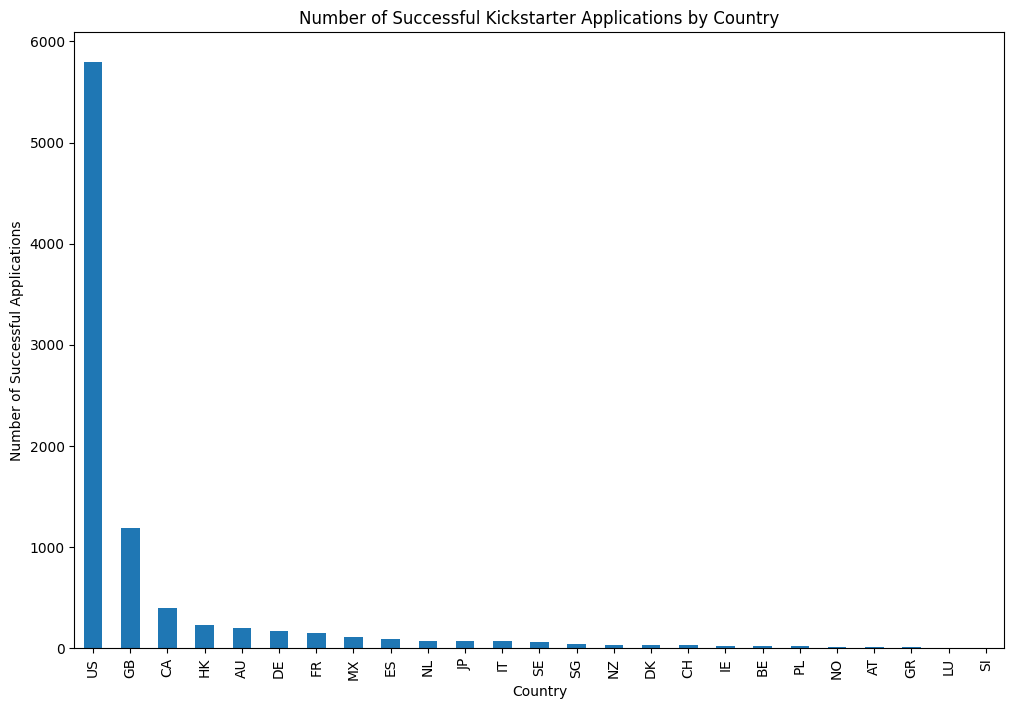

In [120]:
successful_df = merged_df[merged_df['state'] == 'successful']

successful_country_counts = successful_df['country'].value_counts()

plt.figure(figsize=(12, 8))
successful_country_counts.plot(kind='bar')

plt.title('Number of Successful Kickstarter Applications by Country')
plt.xlabel('Country')
plt.ylabel('Number of Successful Applications')

plt.show()

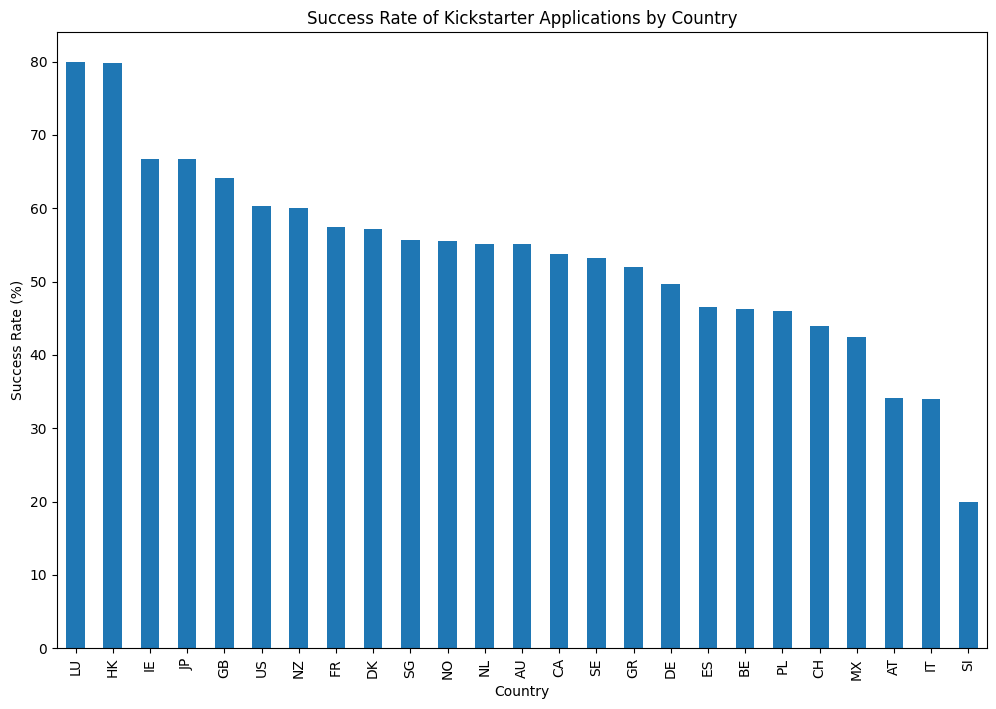

In [121]:
successful_df = merged_df[merged_df['state'] == 'successful']

successful_country_counts = successful_df['country'].value_counts()

total_country_counts = merged_df['country'].value_counts()

success_rate = (successful_country_counts / total_country_counts) * 100

success_rate_sorted = success_rate.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
success_rate_sorted.plot(kind='bar')

plt.title('Success Rate of Kickstarter Applications by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate (%)')

plt.show()

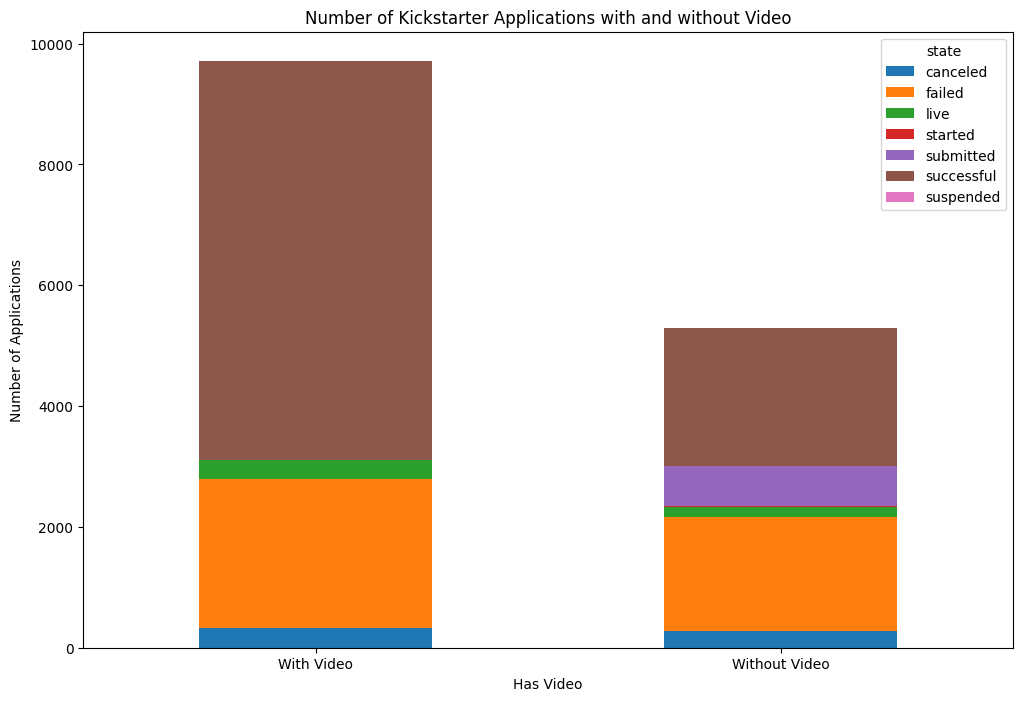

In [122]:
merged_df['has_video'] = merged_df['video'].notna()

video_state_counts = merged_df.groupby(['has_video', 'state']).size().unstack(fill_value=0)

video_state_counts = video_state_counts.reindex([True, False])

ax = video_state_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Kickstarter Applications with and without Video')
plt.xlabel('Has Video')
plt.ylabel('Number of Applications')
plt.xticks(ticks=np.arange(2), labels=['With Video', 'Without Video'], rotation=0)

plt.show()

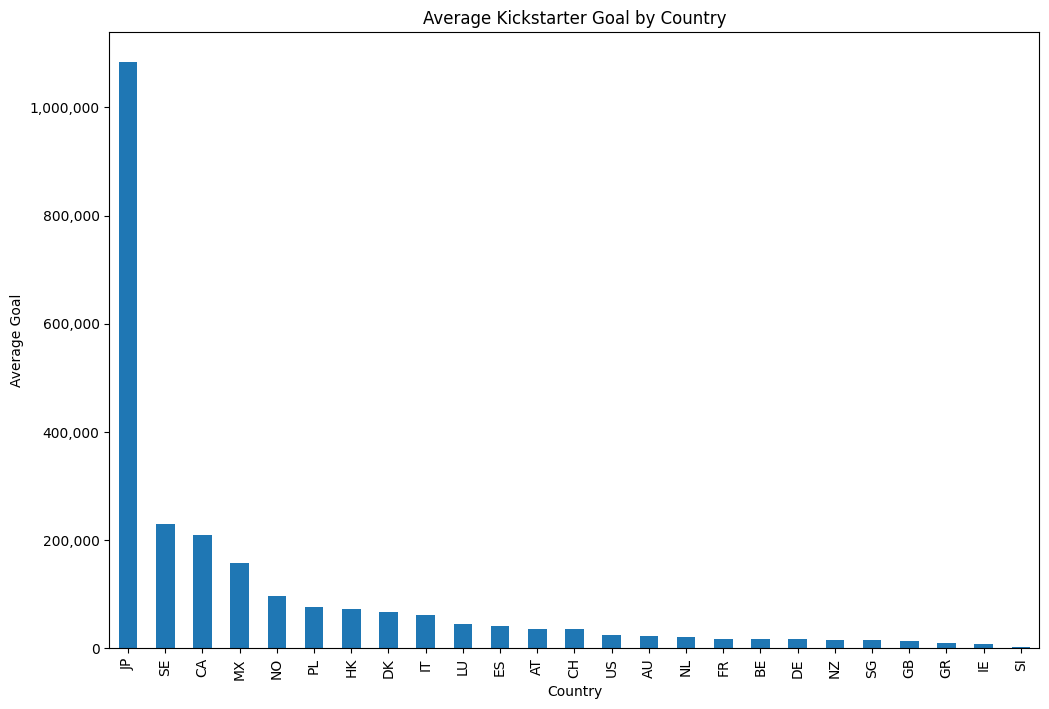

In [123]:
average_goal_per_country = merged_df.groupby('country')['goal'].mean()

average_goal_per_country_sorted = average_goal_per_country.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = average_goal_per_country_sorted.plot(kind='bar')

plt.title('Average Kickstarter Goal by Country')
plt.xlabel('Country')
plt.ylabel('Average Goal')

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

plt.show()


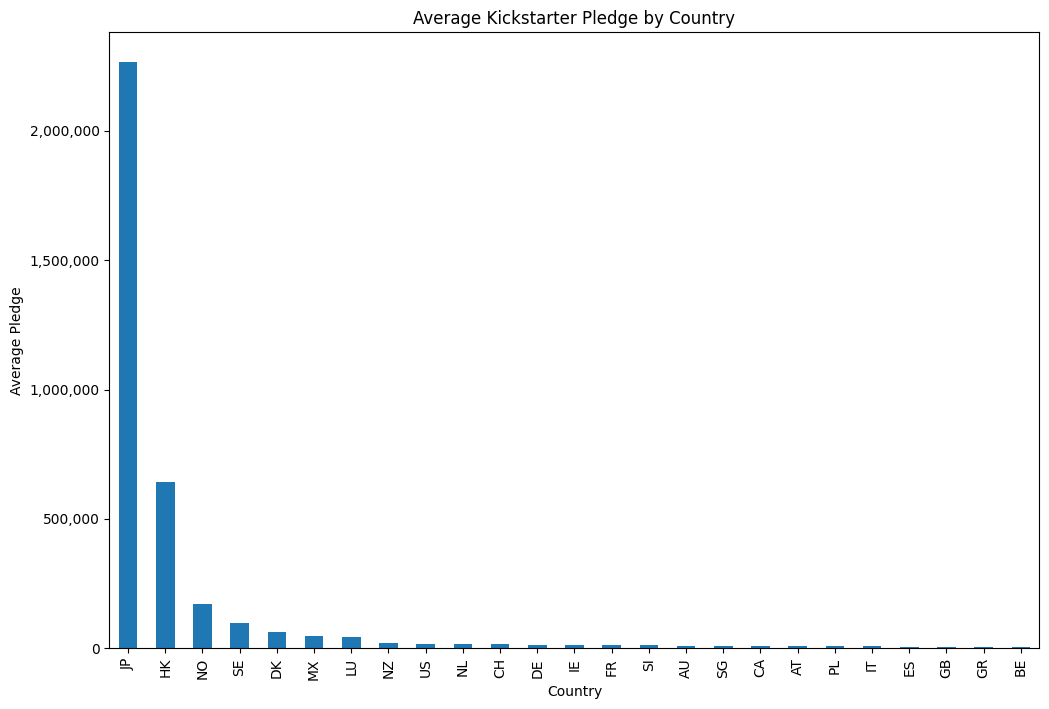

In [124]:
average_pledge_per_country = merged_df.groupby('country')['pledged'].mean()

average_pledge_per_country_sorted = average_pledge_per_country.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = average_pledge_per_country_sorted.plot(kind='bar')

plt.title('Average Kickstarter Pledge by Country')
plt.xlabel('Country')
plt.ylabel('Average Pledge')

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Step 6: Show the plot
plt.show()

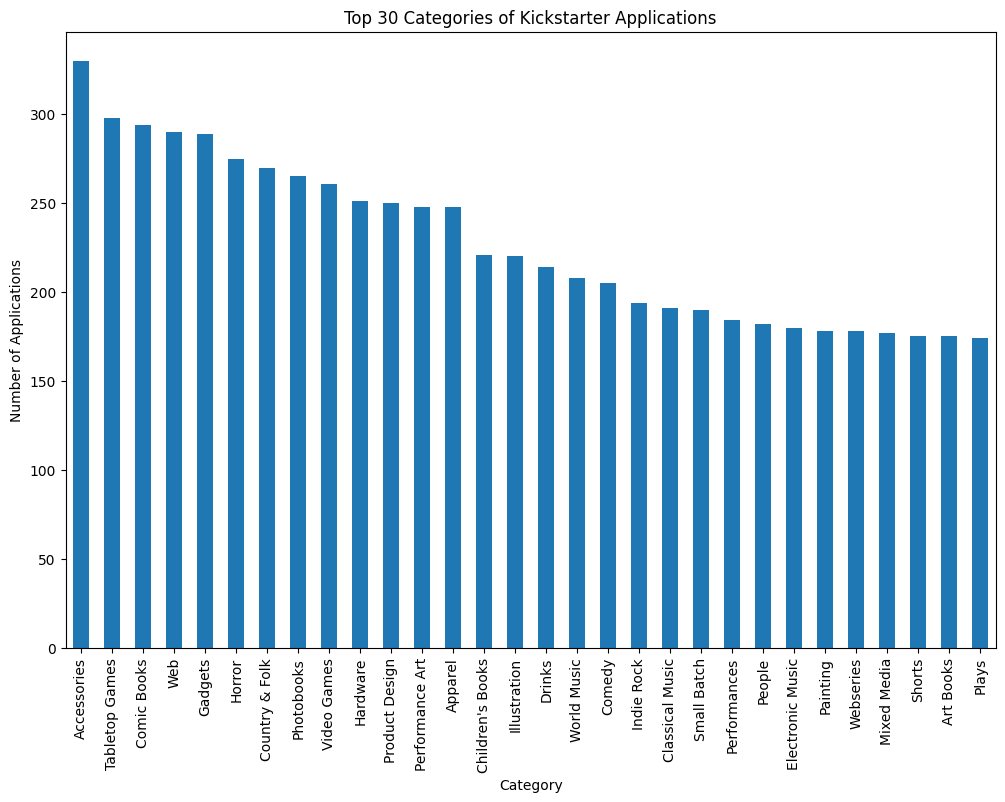

In [125]:
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

top_categories = merged_df['category_name'].value_counts().nlargest(30)

plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar')

plt.title('Top 30 Categories of Kickstarter Applications')
plt.xlabel('Category')
plt.ylabel('Number of Applications')

plt.show()

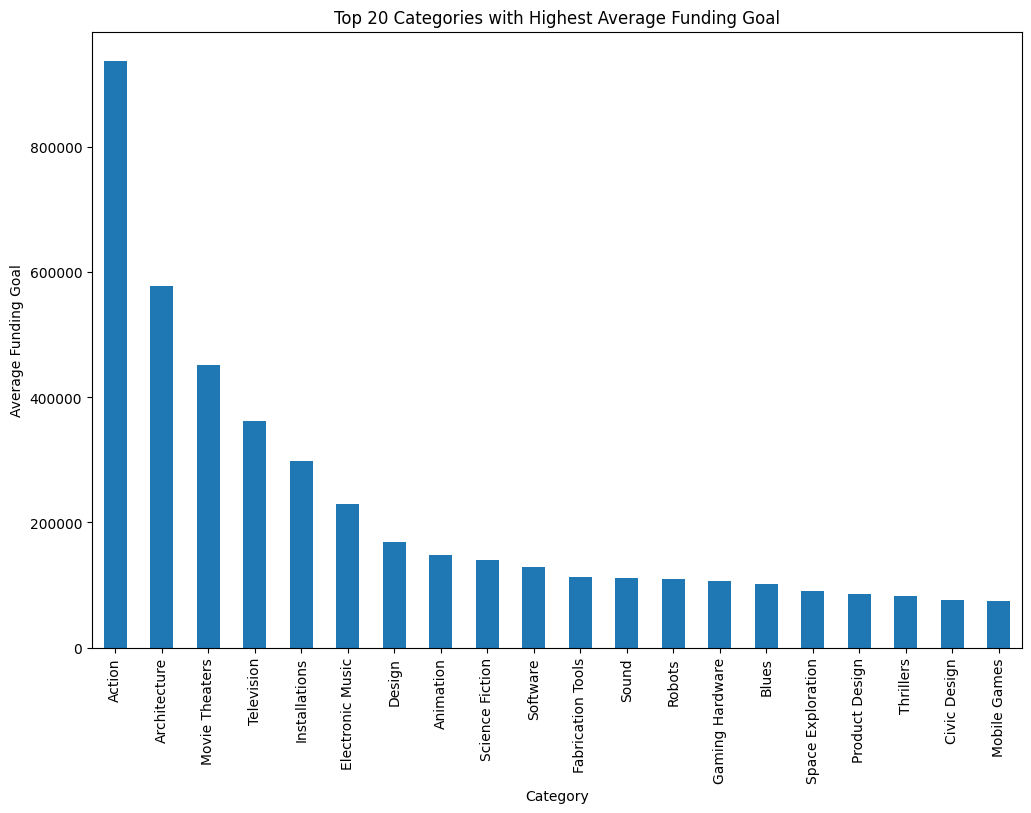

In [126]:
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

average_goal_per_category = merged_df.groupby('category_name')['goal'].mean()

average_goal_per_category_sorted = average_goal_per_category.sort_values(ascending=False)

top_categories = average_goal_per_category_sorted.head(20)

plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar')

plt.title('Top 20 Categories with Highest Average Funding Goal')
plt.xlabel('Category')
plt.ylabel('Average Funding Goal')

# Step 7: Show the plot
plt.show()

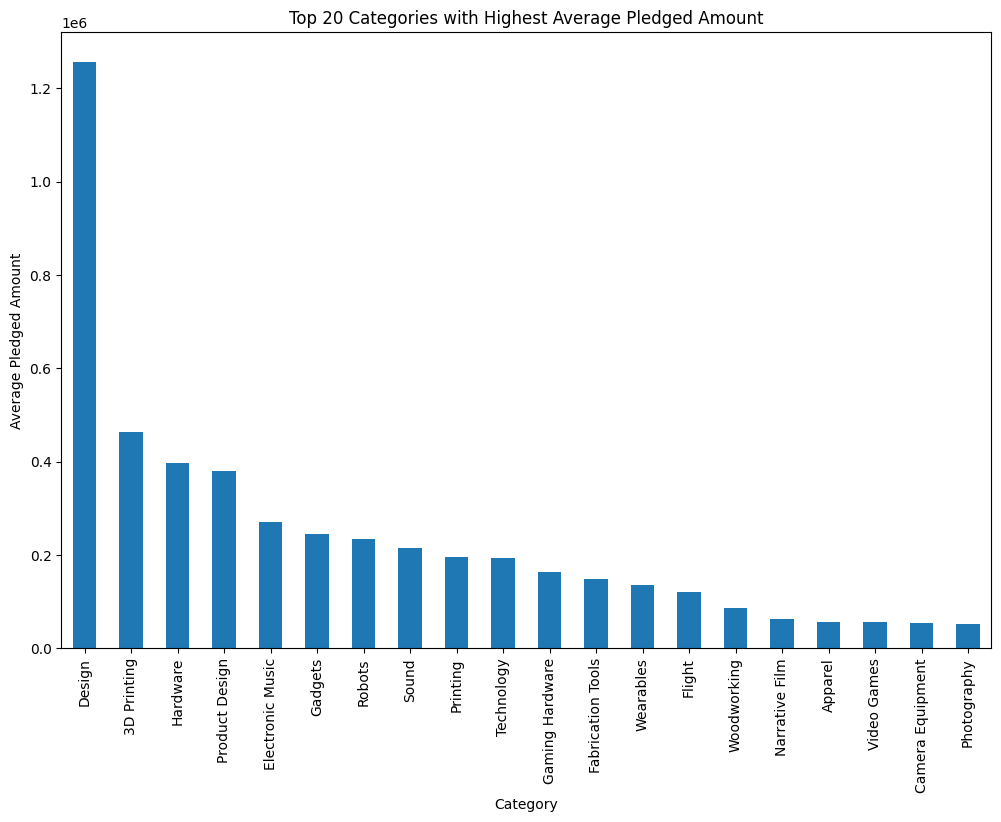

In [127]:
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

average_pledged_per_category = merged_df.groupby('category_name')['pledged'].mean()

average_pledged_per_category_sorted = average_pledged_per_category.sort_values(ascending=False)

top_categories = average_pledged_per_category_sorted.head(20)

plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar')

plt.title('Top 20 Categories with Highest Average Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Average Pledged Amount')

plt.show()

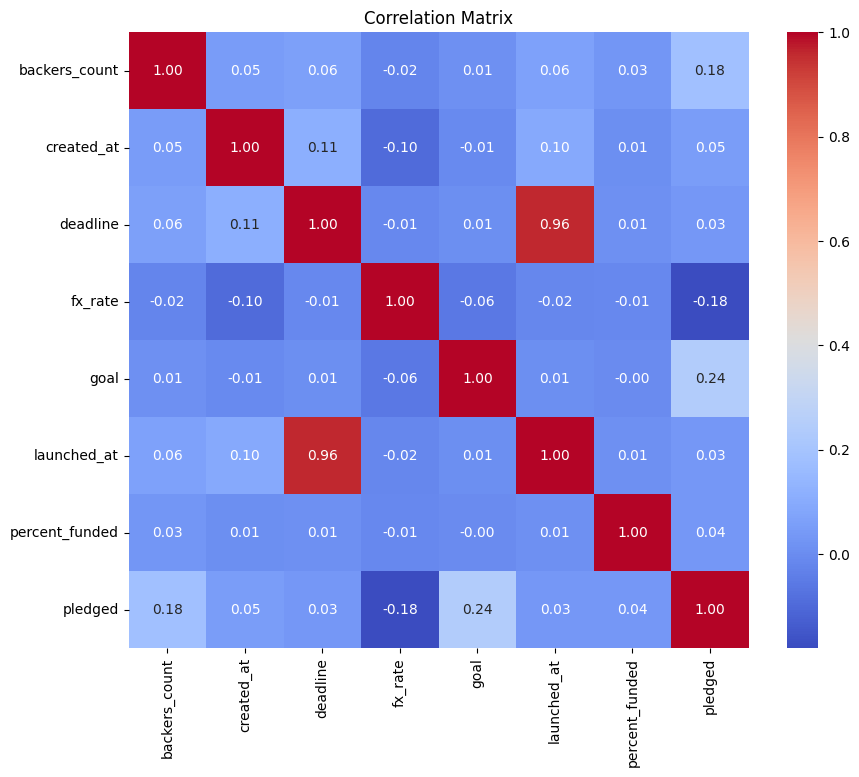

In [128]:
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
columns_to_remove = ['id', 'state_changed_at']

correlation_matrix.drop(columns=columns_to_remove, index=columns_to_remove, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

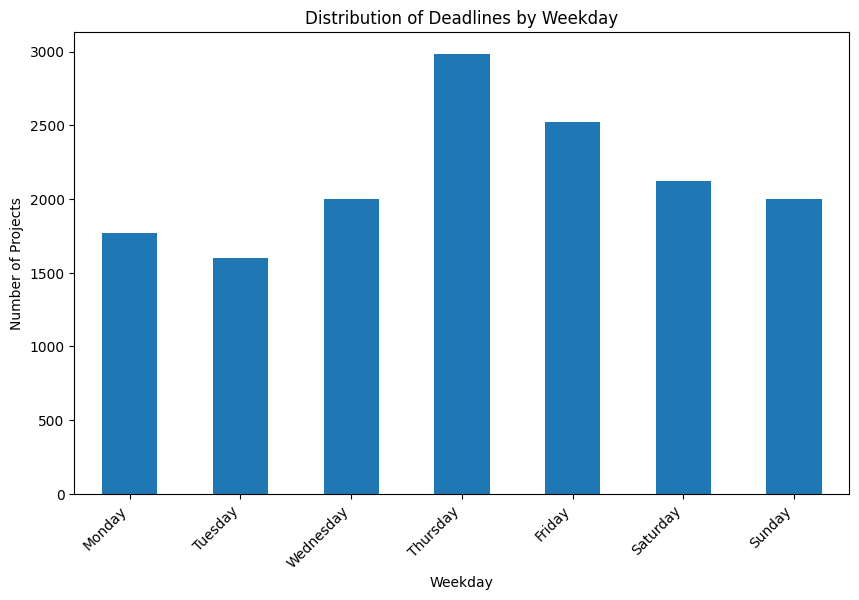

In [129]:
merged_df['deadline'] = pd.to_datetime(merged_df['deadline'], unit='s')

merged_df['weekday'] = merged_df['deadline'].dt.weekday

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
weekday_counts = merged_df['weekday'].value_counts().sort_index()
weekday_counts.plot(kind='bar')

plt.title('Distribution of Deadlines by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Projects')

plt.xticks(range(7), weekday_labels, rotation=45, ha='right')

# Show the plot
plt.show()

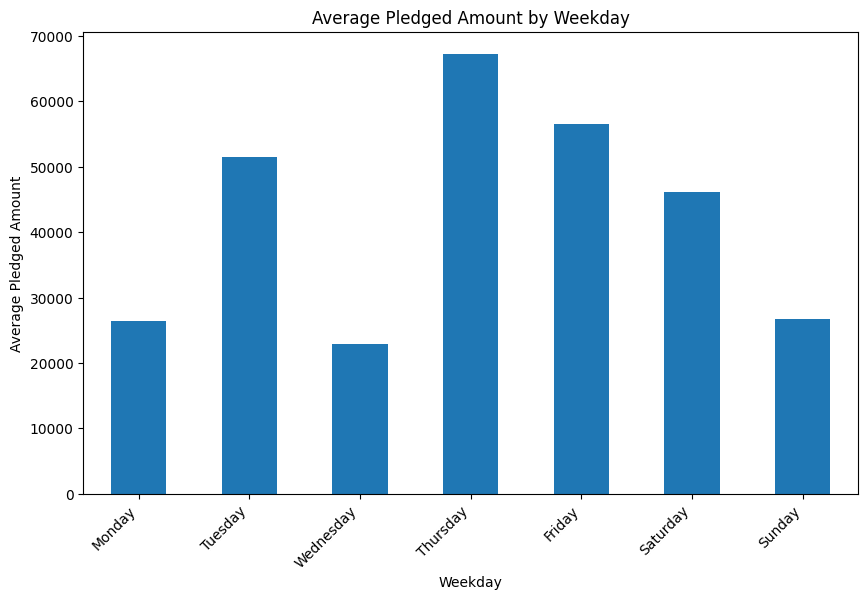

In [130]:
merged_df['deadline'] = pd.to_datetime(merged_df['deadline'], unit='s')

merged_df['weekday'] = merged_df['deadline'].dt.weekday

average_pledged_per_weekday = merged_df.groupby('weekday')['pledged'].mean()

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
average_pledged_per_weekday.plot(kind='bar')

plt.title('Average Pledged Amount by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Pledged Amount')

plt.xticks(range(7), weekday_labels, rotation=45, ha='right')

plt.show()

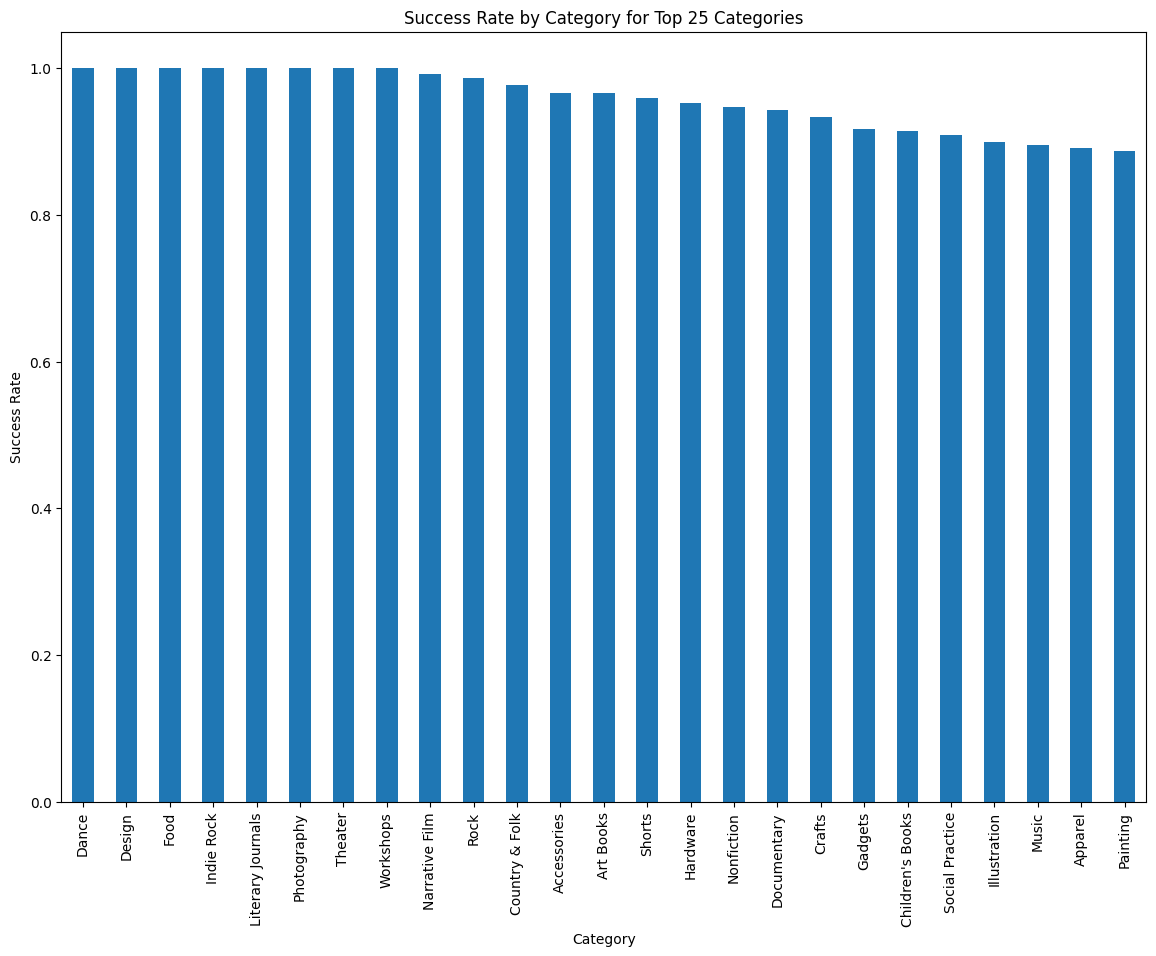

In [131]:
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

success_rate_by_category = merged_df.groupby('category_name')['state'].apply(lambda x: (x == 'successful').mean())

top_categories = success_rate_by_category.nlargest(25)

plt.figure(figsize=(14, 10))
top_categories.plot(kind='bar')

plt.title('Success Rate by Category for Top 25 Categories')
plt.xlabel('Category')
plt.ylabel('Success Rate')

plt.show()

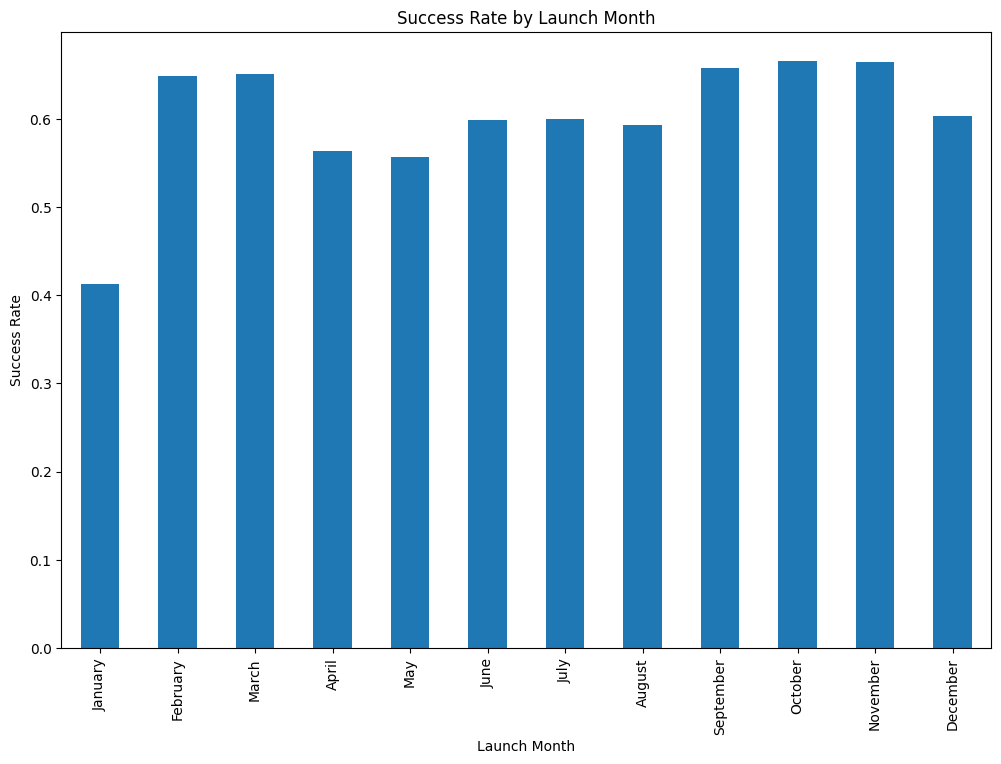

In [132]:
merged_df['launched_at'] = pd.to_datetime(merged_df['launched_at'], unit='s')

merged_df['launch_month'] = merged_df['launched_at'].dt.month

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

success_rate_by_month = merged_df.groupby('launch_month')['state'].apply(lambda x: (x == 'successful').mean())

success_rate_by_month.index = success_rate_by_month.index.map(month_names)

plt.figure(figsize=(12, 8))
success_rate_by_month.plot(kind='bar')

plt.title('Success Rate by Launch Month')
plt.xlabel('Launch Month')
plt.ylabel('Success Rate')

plt.show()

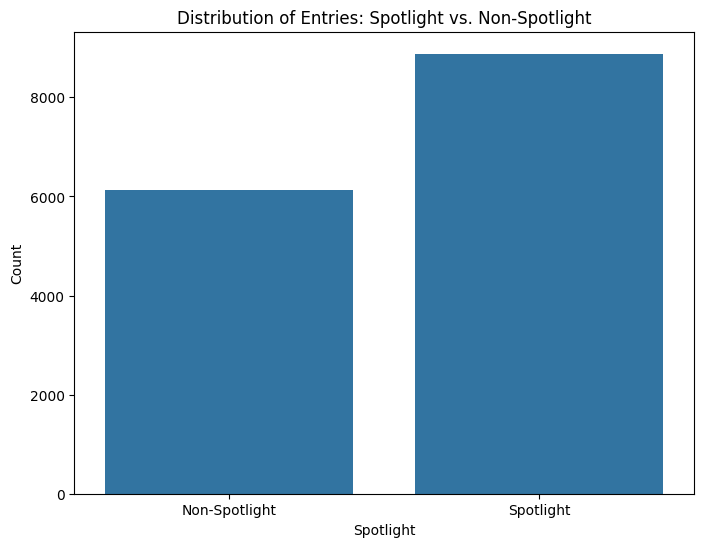

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spotlight', data=merged_df)

plt.title('Distribution of Entries: Spotlight vs. Non-Spotlight')
plt.xlabel('Spotlight')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Spotlight', 'Spotlight'])

plt.show()